## Convolution Neural Network with mnist

In [3]:
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils

import numpy
import sys
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

#mnist 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print('학습셋 이미지 수: %d 개' % (X_train.shape[0]))
print('테스트셋 이미지 수: %d 개' % (X_test.shape[0]))

학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


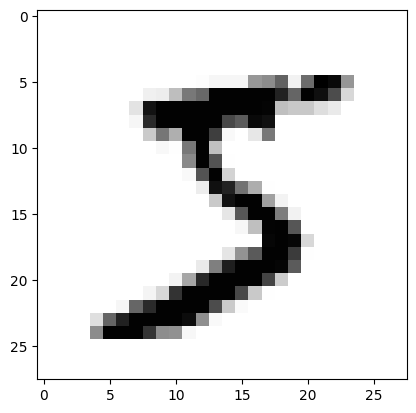

In [4]:
# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


*가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 차원축소 하면 784개의 속성으로 이용 가능

*reshape(총 샘플 수, 1차원 속성의 수) 형식으로 지정함

In [6]:
# 28x28 2차원 데이터를 784개의 1차원 데이터로 바꿔주면 784개의 속성으로 이용 가능
# 차원 변환 과정 (2차원 -> 1차원)

X_train = X_train.reshape(X_train.shape[0], 784)

# 정규화(normalization) : 데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정
# 현재 주어진 데이터의 값은 0부터 255까지의 정수로, 정규화를 위해 255로 나누어 주려면 먼저 이 값을 실수형으로 바꿔야 함 
#-> astype('float64')

# 케라스는 데이터가 0 ~ 1 사이 값일 때 최적의 성능으로 예측
# 데이터 정규화 : 255로 나눠준다

X_train = X_train.astype('float64') # 현재 정수형이므로 실수형으로 바꾼 후 정규화 실행
X_train = X_train / 255

# 테스트셋에도 정규화 작업

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

*실제로 이 숫자의 레이블이 어떤지를 불러오고자 Y_class_train[0]을 출력해보자

*아이리스 품종을 예측할 때 딥러닝의 분류 문제를 해결하려면 원핫 인코딩을 해야 함

*즉, 0~9까지의 정수형 값을 갖는 현재 형태에서 0 또는 1로만 이루어진 벡터로 값을 수정
-> 바이너리화 과정

*to_categorical(클래스, 클래스의 수) 함수 이용 원 핫 인코딩 -> 0, 1로만 이루어진 벡터로 변환

In [7]:
# 클래스 값 확인
print('class : %d' % (Y_class_train[0]))

# 현재 클래스를 0~9 정수값에서 0 or 1인 벡터로 수정해야 함
# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])

class : 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# Mnist 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 차원 축소, 정규화
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [14]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 저장, 모델 최적화 단계에서 학습 자동 중단 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,
                              save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                   epochs=30, batch_size=200, verbose=0,
                   callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.14659, saving model to ./model\01-0.1466.hdf5

Epoch 2: val_loss improved from 0.14659 to 0.10240, saving model to ./model\02-0.1024.hdf5

Epoch 3: val_loss improved from 0.10240 to 0.08764, saving model to ./model\03-0.0876.hdf5

Epoch 4: val_loss improved from 0.08764 to 0.07788, saving model to ./model\04-0.0779.hdf5

Epoch 5: val_loss improved from 0.07788 to 0.07559, saving model to ./model\05-0.0756.hdf5

Epoch 6: val_loss improved from 0.07559 to 0.06788, saving model to ./model\06-0.0679.hdf5

Epoch 7: val_loss improved from 0.06788 to 0.06668, saving model to ./model\07-0.0667.hdf5

Epoch 8: val_loss improved from 0.06668 to 0.06069, saving model to ./model\08-0.0607.hdf5

Epoch 9: val_loss did not improve from 0.06069

Epoch 10: val_loss did not improve from 0.06069

Epoch 11: val_loss did not improve from 0.06069

Epoch 12: val_loss did not improve from 0.06069

Epoch 13: val_loss improved from 0.06069 to 0.05962, saving model to ./m

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
history.history

{'loss': [0.30388331413269043,
  0.12392816692590714,
  0.0807996392250061,
  0.06002352014183998,
  0.044682882726192474,
  0.03467218950390816,
  0.02704322524368763,
  0.021344071254134178,
  0.015405050478875637,
  0.011569436639547348,
  0.009272672235965729,
  0.008075783029198647,
  0.005556238349527121,
  0.00385269895195961,
  0.0035772596020251513,
  0.003605777630582452,
  0.0062780375592410564,
  0.007089636754244566,
  0.004293972160667181,
  0.0044699241407215595,
  0.001456943340599537,
  0.0006592748104594648,
  0.0003971465048380196],
 'accuracy': [0.9143499732017517,
  0.9642333388328552,
  0.9767666459083557,
  0.9824833273887634,
  0.9871000051498413,
  0.9903333187103271,
  0.9926499724388123,
  0.9943166375160217,
  0.9964333176612854,
  0.9976666569709778,
  0.99836665391922,
  0.9984666705131531,
  0.9994000196456909,
  0.9995666742324829,
  0.999750018119812,
  0.9994500279426575,
  0.9985499978065491,
  0.998116672039032,
  0.9990666508674622,
  0.998866677284